# Potability of Water

## Part I, in this part I will be attempting to model my data by dropping nulls and modeling using a decision tree! 

Import libraries

In [100]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, scipy as stats

Create our dataframe

In [101]:
df = pd.read_csv('water_potability.csv')

Take a look at our DF

In [102]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Looking at our table, we notice that the only column that is a boolean is the potability column, this will be our target. 

I want to go ahead and change the name of the Organic_carbon column, it just isn't easy to work with.

In [103]:
df.rename(columns = {'Organic_carbon':'Carbon'}, inplace = True)

That is much better!

In [104]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


I see there is a lot of nulls in the Sulfate column, let's see how many rows we lose if we drop. 

In [105]:
df = df.dropna(axis=0)

In [106]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


We lost less than half of our rows, I think that will not hurt our analysis here.   

Let's check our data types to make sure they are correct!

In [107]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Carbon             float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

They are so let's move on to training our data.

<Axes: xlabel='Potability', ylabel='count'>

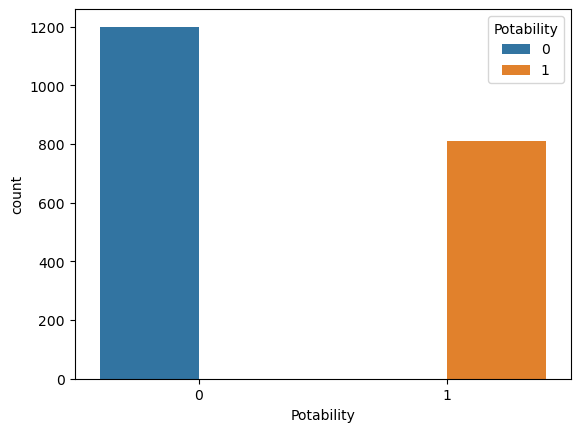

In [108]:
sns.countplot(x = 'Potability', data=df, hue = 'Potability')

<Axes: xlabel='Sulfate', ylabel='Count'>

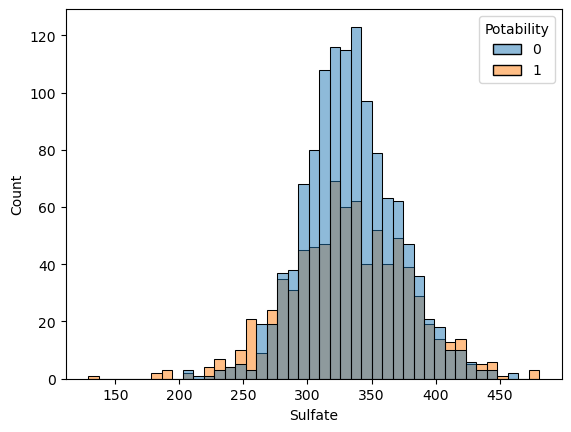

In [109]:
sns.histplot(x = 'Sulfate', data=df, hue = 'Potability')

<Axes: xlabel='Hardness', ylabel='Count'>

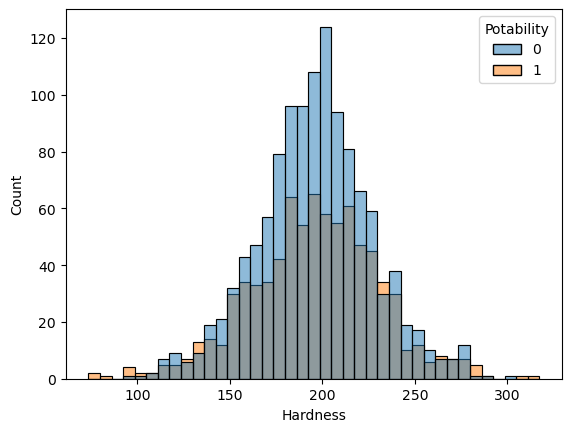

In [110]:
sns.histplot(x = 'Hardness', data=df, hue = 'Potability')

<Axes: xlabel='ph', ylabel='Count'>

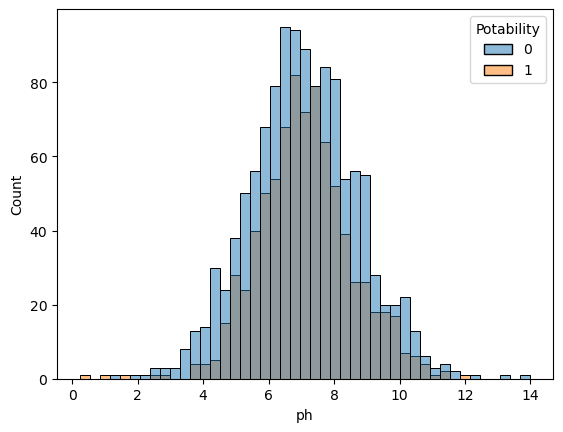

In [111]:
sns.histplot(x = 'ph', data=df, hue = 'Potability')

#### Our features will be anything that is not in potability

In [112]:
X = df.drop(columns = ['Potability'])
y = df['Potability']

In [113]:
X.shape, y.shape

((2011, 9), (2011,))

Cool, our data is trained ฅ^•ﻌ•^ฅ

In [114]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [115]:
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 9), (1006, 9), (1005,), (1006,))

In [119]:
from sklearn import tree

In [120]:
clf = tree.DecisionTreeClassifier()

In [121]:
clf = clf.fit(X_train, y_train)

In [122]:
predicted = clf.predict(X_test)

In [123]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       599
           1       0.53      0.54      0.53       407

    accuracy                           0.62      1006
   macro avg       0.60      0.60      0.60      1006
weighted avg       0.62      0.62      0.62      1006



In [ ]:
predicted

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns.tolist(), filled=True)
plt.show()

In [ ]:
fi = clf.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

In [ ]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
confusion_matrix(y_test, predicted)

NameError: name 'confusion_matrix' is not defined

In [26]:
clf.score(X_test, y_test)

0.6153081510934394

In [27]:
actual = np.repeat([1, 0], repeats=[609, 397])

In [28]:
pred = np.repeat([1, 0, 1, 0], repeats=[401, 208, 192, 205])

In [29]:
f1_score(actual, pred)

NameError: name 'f1_score' is not defined

In [30]:
from sklearn.metrics import f1_score

## Part II

### Let's see if we can improve our accuracy by addressing outliers!

### Here we will drop rows with outliers based on our box plot :), then we will try our decision tree again to see if we can improve our accuracy score :D

So how are our outliers looking? 

In [31]:
df2 = pd.read_csv('water_potability.csv')

<Axes: >

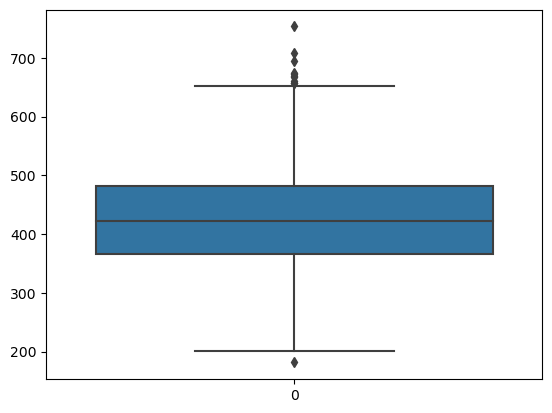

In [32]:
sns.boxplot(df2['Conductivity'])

In [33]:
df2 = df2.drop(df2[df2['Conductivity']<200].index)

In [34]:
df2 = df2.drop(df2[df2['Conductivity']>665].index)

<Axes: >

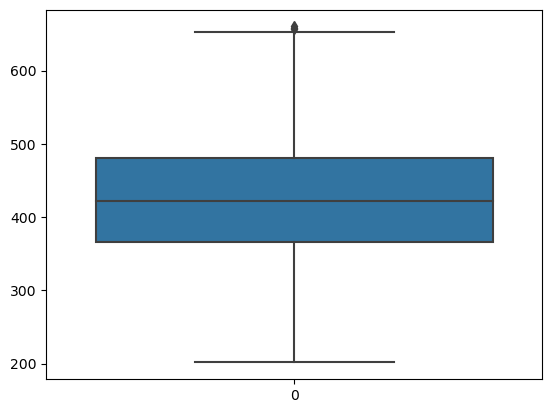

In [35]:
sns.boxplot(df2['Conductivity'])

<Axes: >

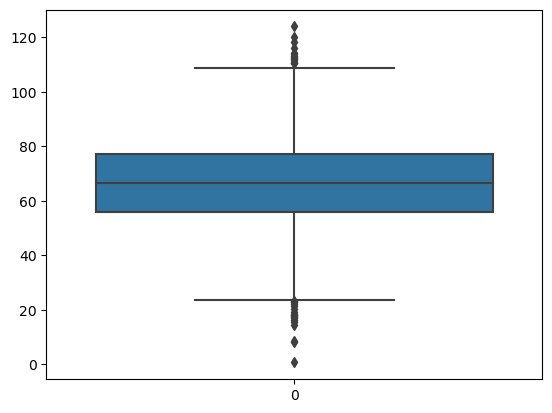

In [36]:
sns.boxplot(df2['Trihalomethanes'])

In [37]:
df2 = df2.drop(df2[df2['Trihalomethanes']<30].index)

In [38]:
df2 = df2.drop(df2[df2['Trihalomethanes']>109].index)

<Axes: >

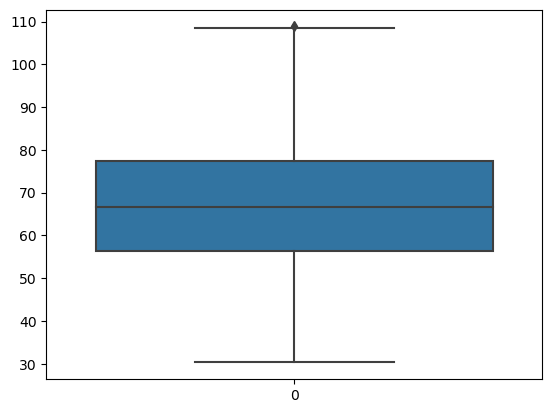

In [39]:
sns.boxplot(df2['Trihalomethanes'])

<Axes: >

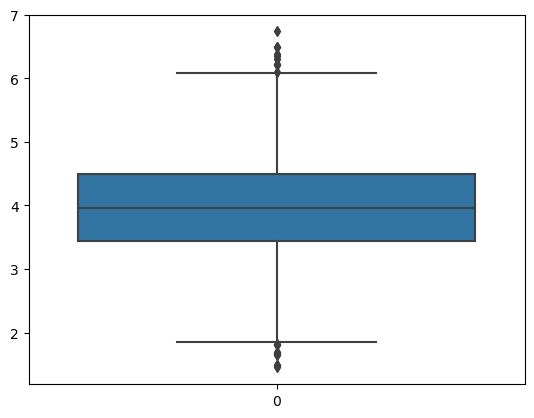

In [40]:
sns.boxplot(df2['Turbidity'])

In [41]:
df2 = df2.drop(df2[df2['Turbidity']<2.4].index)

In [42]:
df2 = df2.drop(df2[df2['Turbidity']>6].index)

<Axes: >

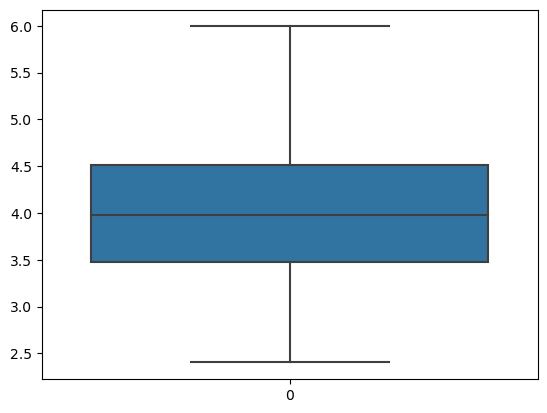

In [43]:
sns.boxplot(df2['Turbidity'])

<Axes: >

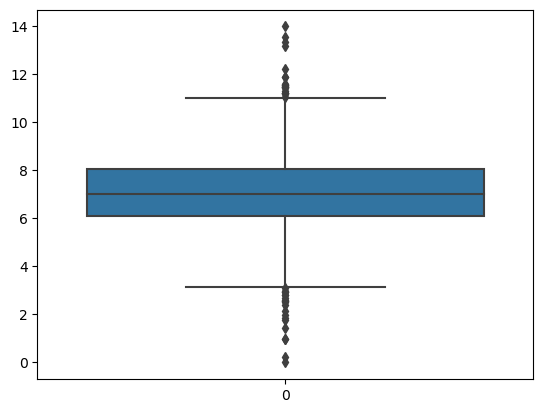

In [44]:
sns.boxplot(df2['ph'])

In [45]:
df2 = df2.drop(df2[df2['ph']<3].index)

In [46]:
df2 = df2.drop(df2[df2['ph']>11].index)

<Axes: >

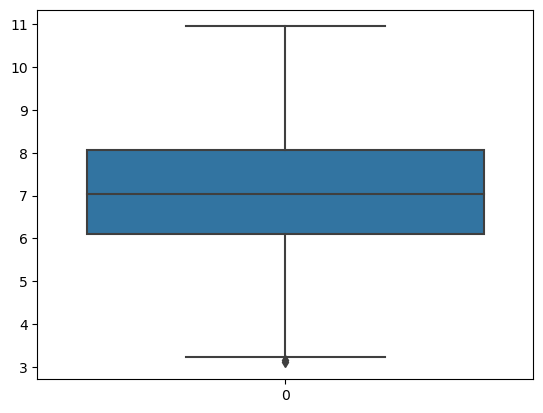

In [47]:
sns.boxplot(df2['ph'])

<Axes: >

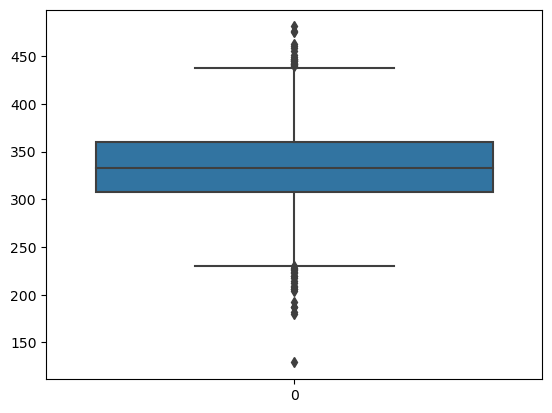

In [48]:
sns.boxplot(df2['Sulfate'])

In [49]:
df2 = df2.drop(df2[df2['Sulfate']<230].index)

In [50]:
df2 = df2.drop(df2[df2['Sulfate']>430].index)

<Axes: >

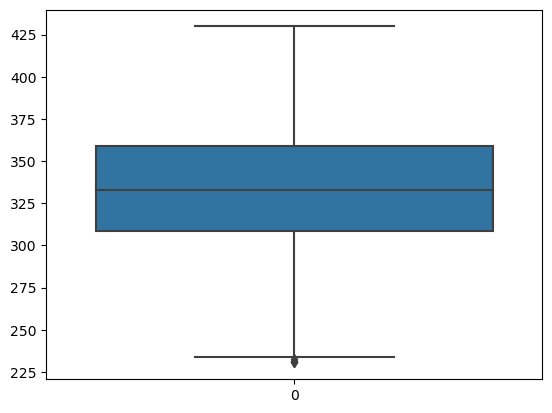

In [51]:
sns.boxplot(df2['Sulfate'])

<Axes: >

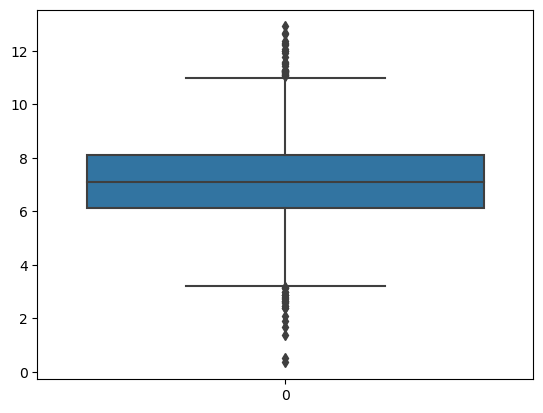

In [52]:
sns.boxplot(df2['Chloramines'])

In [53]:
df2 = df2.drop(df2[df2['Chloramines']>11].index)

In [54]:
df2 = df2.drop(df2[df2['Chloramines']<3].index)

<Axes: >

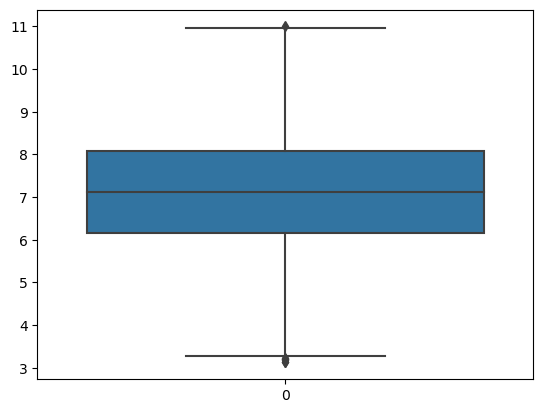

In [55]:
sns.boxplot(df2['Chloramines'])

<Axes: >

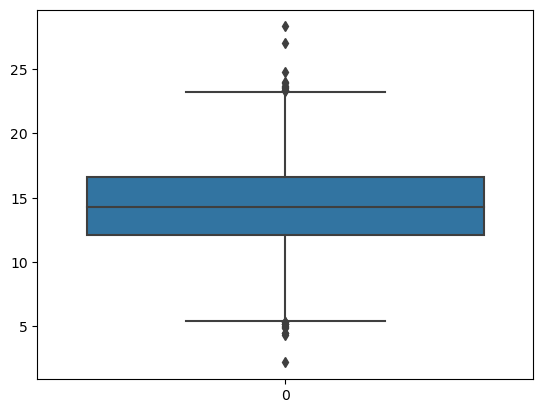

In [56]:
sns.boxplot(df2['Organic_carbon'])

In [57]:
df2 = df2.drop(df2[df2['Organic_carbon']<4].index)

In [58]:
df2 = df2.drop(df2[df2['Organic_carbon']>23].index)

<Axes: >

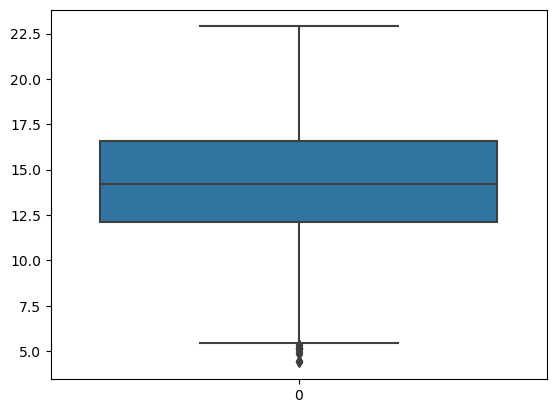

In [59]:
sns.boxplot(df2['Organic_carbon'])

<Axes: >

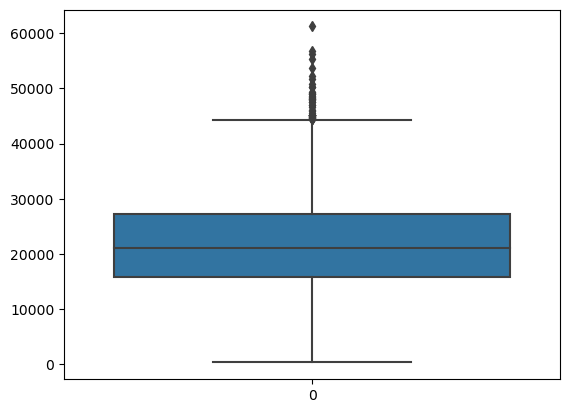

In [60]:
sns.boxplot(df2['Solids'])

In [61]:
df2 = df2.drop(df2[df2['Solids']>45000].index)

<Axes: >

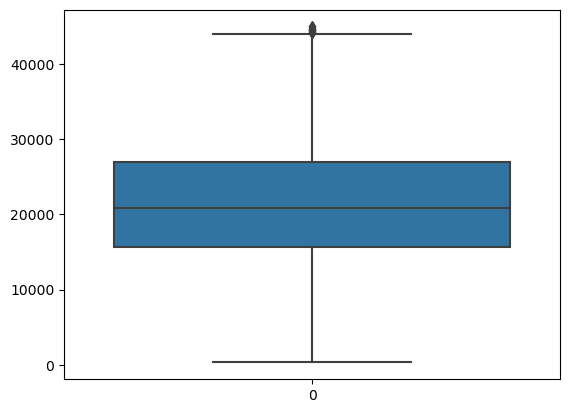

In [62]:
sns.boxplot(df2['Solids'])

<Axes: >

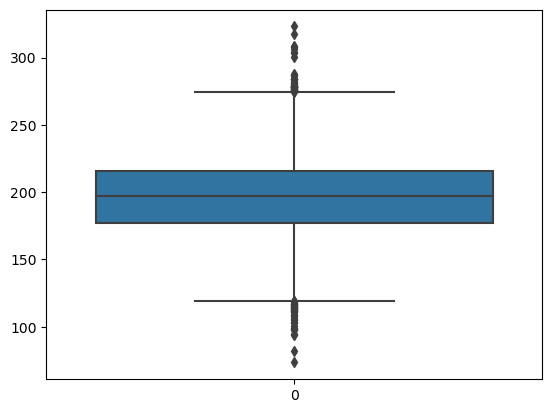

In [63]:
sns.boxplot(df2['Hardness'])

In [64]:
df2 = df2.drop(df2[df2['Hardness']>265].index)

In [65]:
df2 = df2.drop(df2[df2['Hardness']<175].index)

<Axes: >

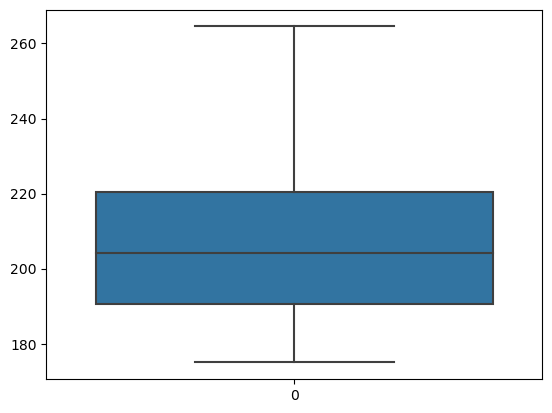

In [66]:
sns.boxplot(df2['Hardness'])

In [67]:
df2 = df2.dropna(axis=0) # drop nulls!

In [68]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3263,6.923636,260.593154,24792.525623,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1


In [69]:
X2 = df2.drop(columns = ['Potability'])
y2 = df2['Potability']

In [70]:
X2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3263,6.923636,260.593154,24792.525623,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843


In [71]:
y2

3       0
4       0
5       0
6       0
7       0
       ..
3263    1
3264    1
3265    1
3267    1
3270    1
Name: Potability, Length: 1332, dtype: int64

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size = 0.5)

In [73]:
from sklearn import tree

In [74]:
clt = tree.DecisionTreeClassifier()
clt = clt.fit(X2_train, y2_train)

In [75]:
predicted2 = clt.predict(X2_test)

In [76]:
predicted2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

### Still not where I would like it to be :(

In [77]:
clt.score(X2_test, y2_test)

0.5900900900900901

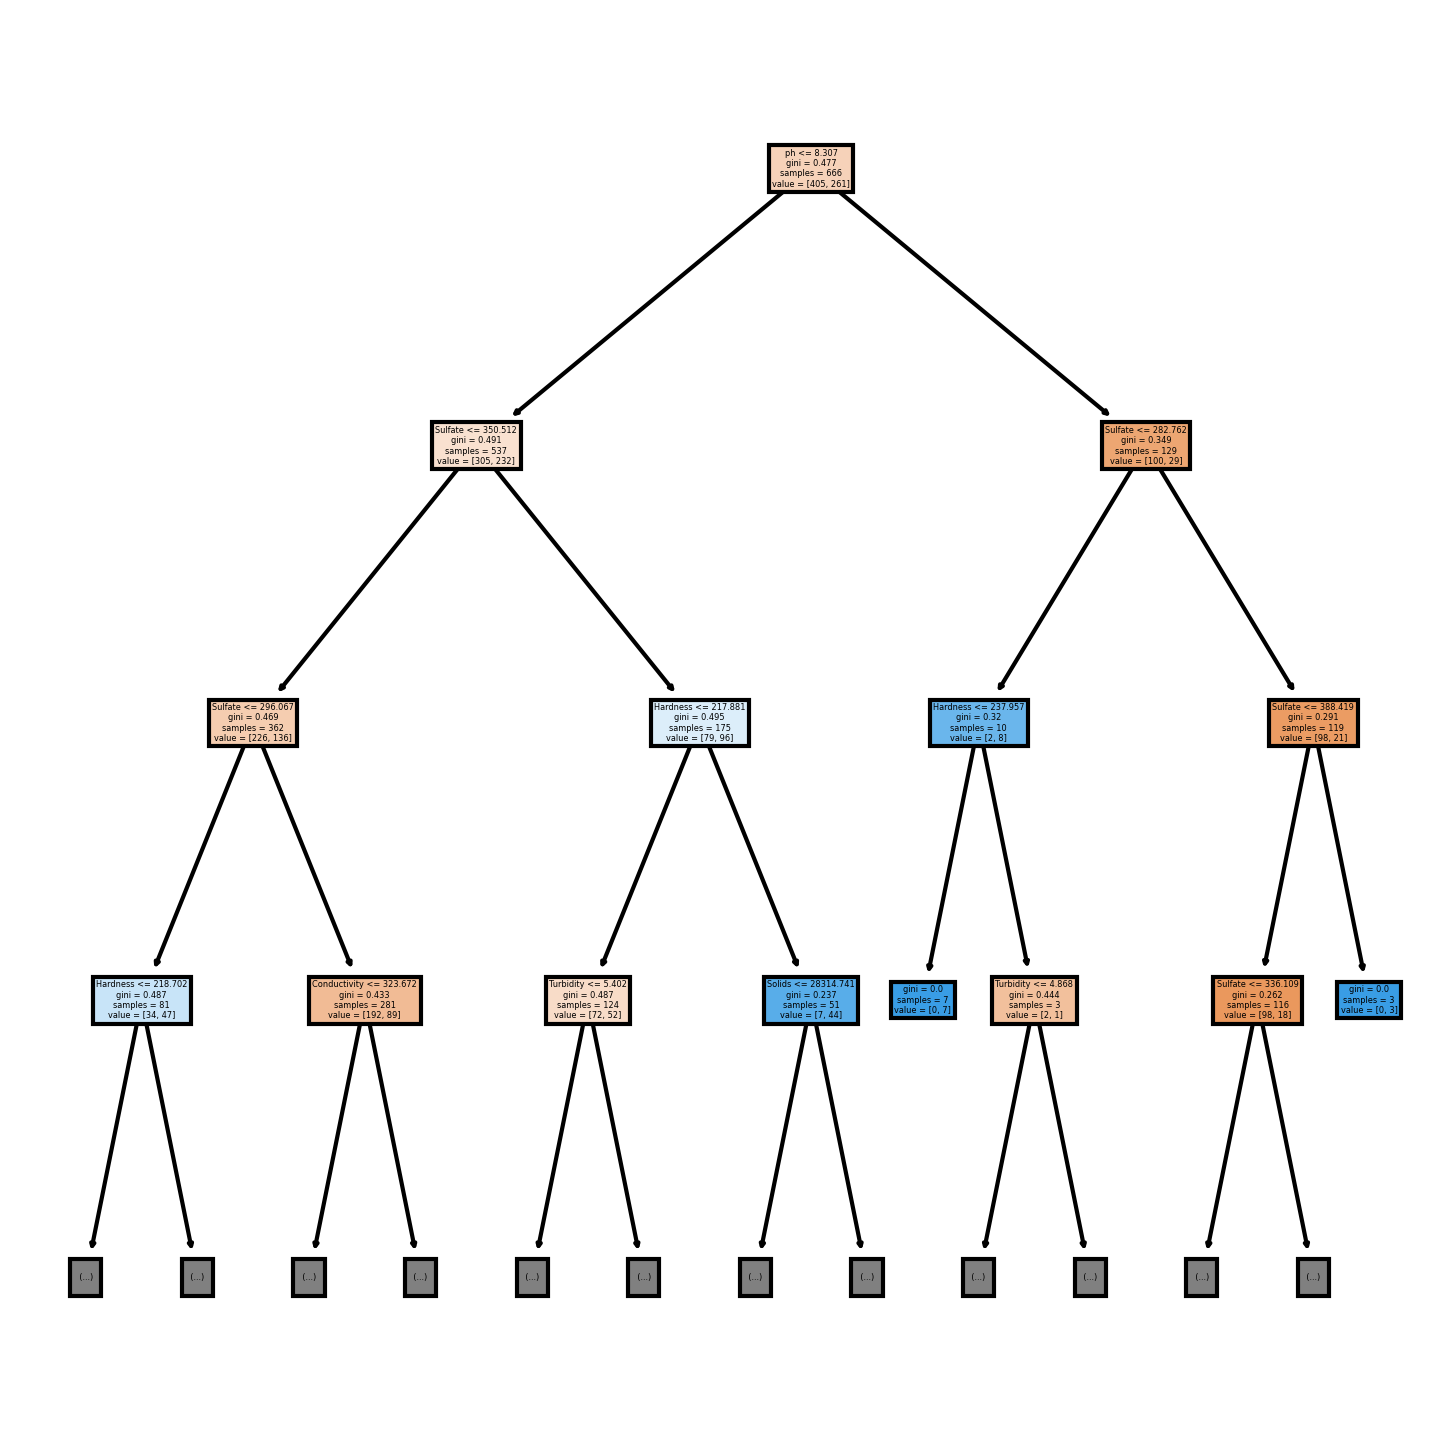

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clt, max_depth = 3, feature_names = X2.columns.tolist(), filled=True)
plt.show()

In [79]:
fi = clt.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/6z/4s30_5h12pjb4trc30n55nzc0000gn/T/ipykernel_12320/4110963205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


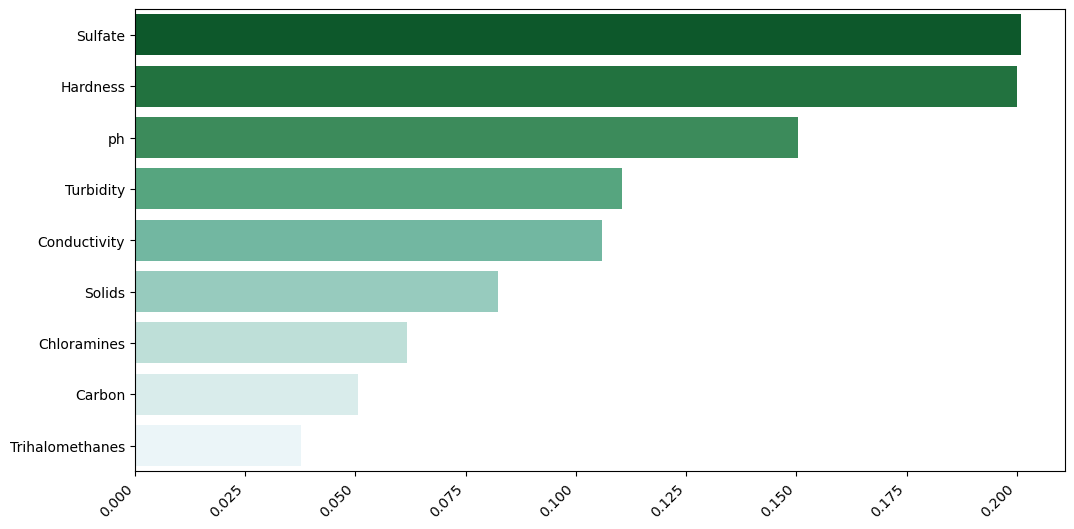

In [80]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [81]:
from sklearn import metrics


In [82]:
predicted2 = clt.predict(X2_test)
print(metrics.classification_report(y2_test, predicted2))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       408
           1       0.47      0.45      0.46       258

    accuracy                           0.59       666
   macro avg       0.56      0.56      0.56       666
weighted avg       0.59      0.59      0.59       666



## Part III

### Since our score did not improve, we will attempt to replace null values w a mean value to see if removing the nulls were the issue. We will keep outliers here as I did try it without and it made the result lower :)

In [83]:
df3 = pd.read_csv('water_potability.csv')

In [84]:
mean = df3.mean()

In [85]:
df.fillna(mean, inplace=True)

/var/folders/6z/4s30_5h12pjb4trc30n55nzc0000gn/T/ipykernel_12320/942079632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(mean, inplace=True)


In [86]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1005, 9), (1005,), (1006, 9), (1006,))

In [88]:
from sklearn import tree

In [89]:
clt = tree.DecisionTreeClassifier()
clt = clt.fit(X_train, y_train)

In [90]:
predicted2 = clt.predict(X_test)

In [91]:
clt.score(X_test, y_test)

0.5526838966202783

In [92]:
fi = clt.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

/var/folders/6z/4s30_5h12pjb4trc30n55nzc0000gn/T/ipykernel_12320/4110963205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


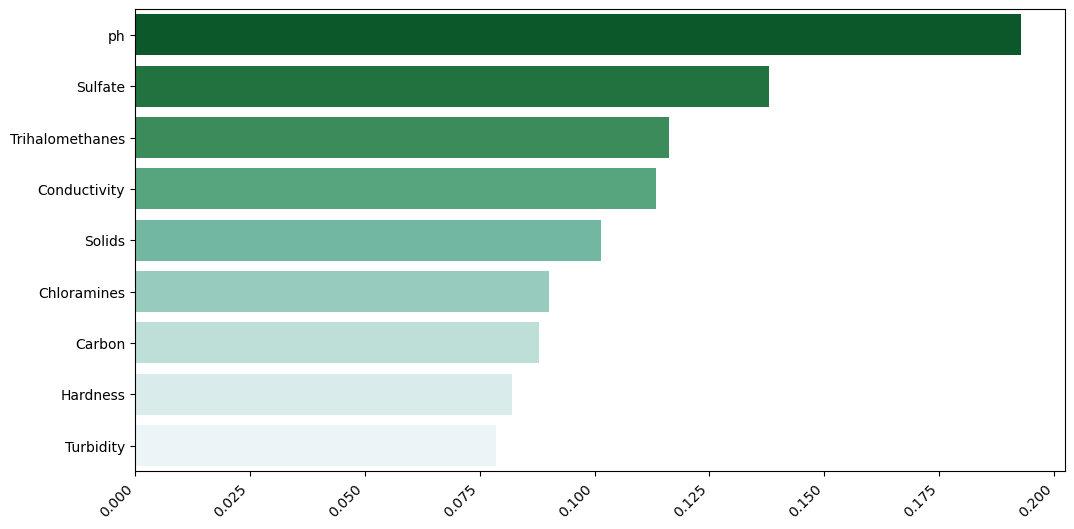

In [93]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

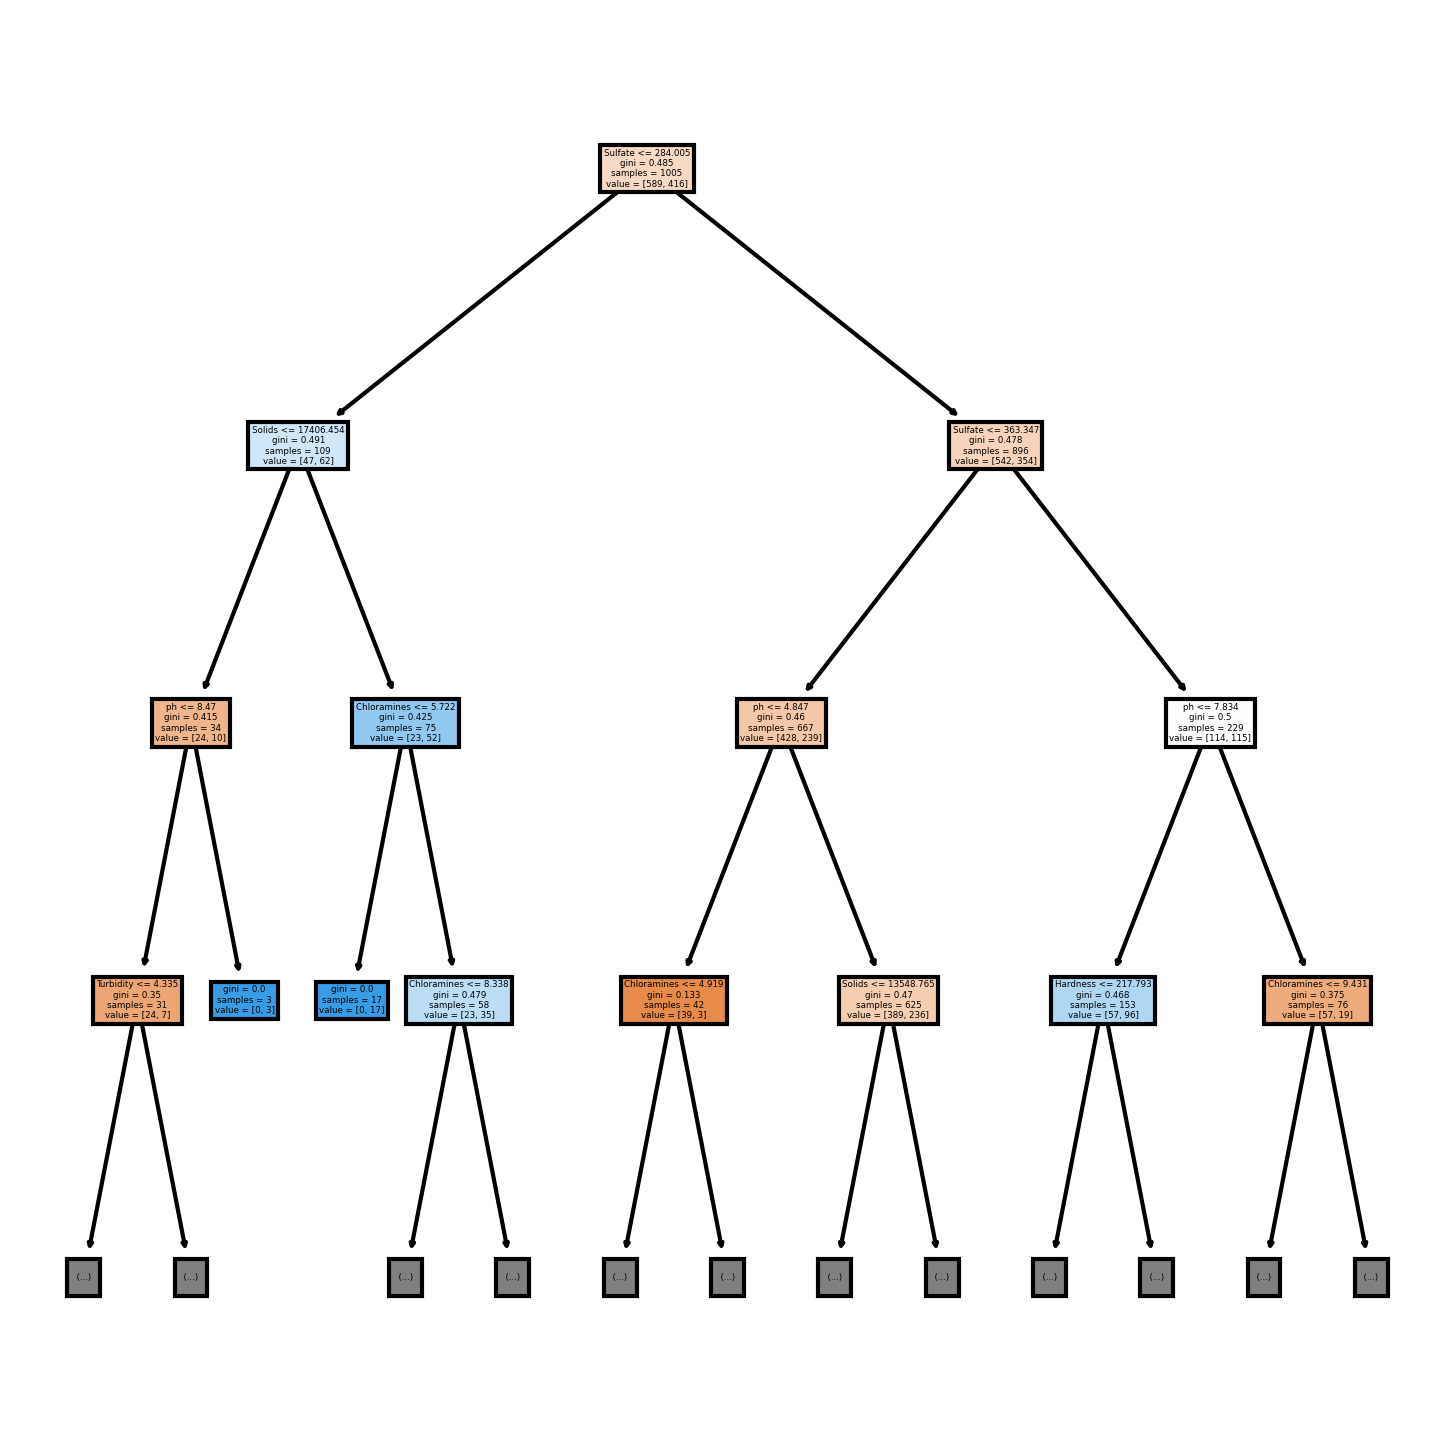

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns.tolist(), filled=True)
plt.show()

In [96]:
confusion_matrix(y_test, predicted)

NameError: name 'confusion_matrix' is not defined

In [98]:
df4 = pd.read_csv('water_potability.csv')

In [99]:
X4 = df4.drop(columns = ['Potability'])
y4 = df4['Potability']